In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = '/Users/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [13]:
df['price'].isnull().any()

False

PART 1

In [10]:
# Frequency Table

frequency = df['category'].value_counts()
top_5 = frequency.head(5)
top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

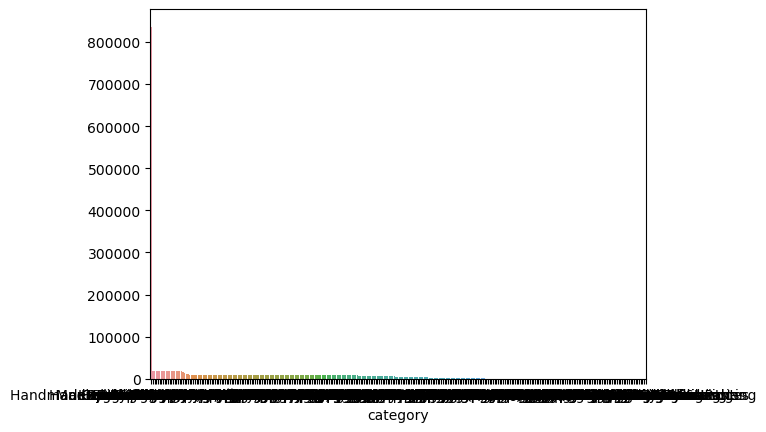

In [13]:
sns.barplot(x=frequency.index, y=frequency.values);

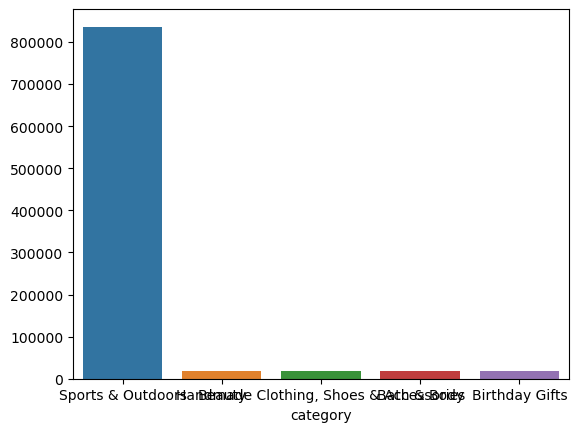

In [14]:
sns.barplot(x=top_5.index, y=top_5.values);

<Axes: ylabel='count'>

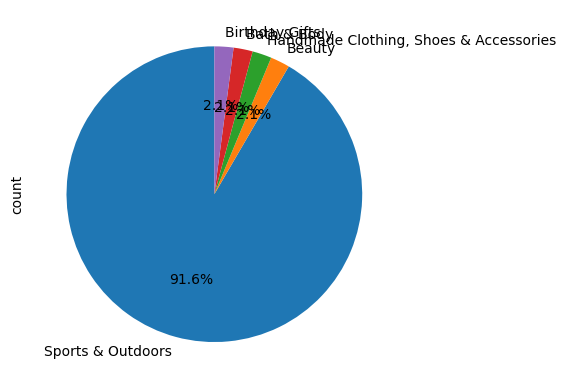

In [17]:
top_5.plot.pie(autopct='%1.1f%%', startangle=90)

Sports & Outdoors dominates listings

PART 2

In [8]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

The average pricepoint is $89.24. It is just short of 9x the amount of the mode price.

In [10]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

The prices are quite varied. The variance is high and so is the standard deviation. With both measurements being high, then the prices can vary significantly from the average of 19.09.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


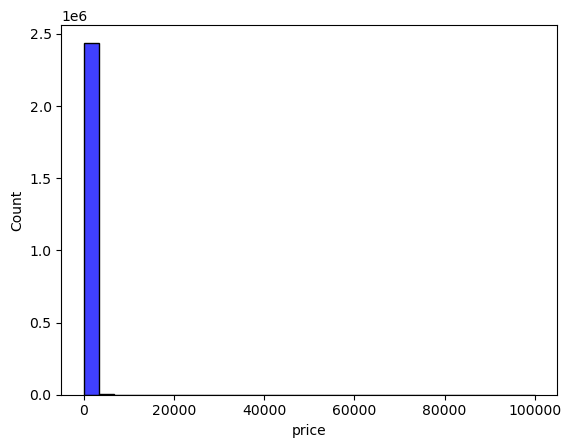

In [16]:
sns.histplot(df['price'], bins=30, color="blue");

This histogram is hard to read, but it also showcases that the bulk of products are priced fairly low compared to the entire range of prices. It would be worth looking at the data without the any products that cost more than potentially $5,000 per interpretation of the graph.

<Axes: >

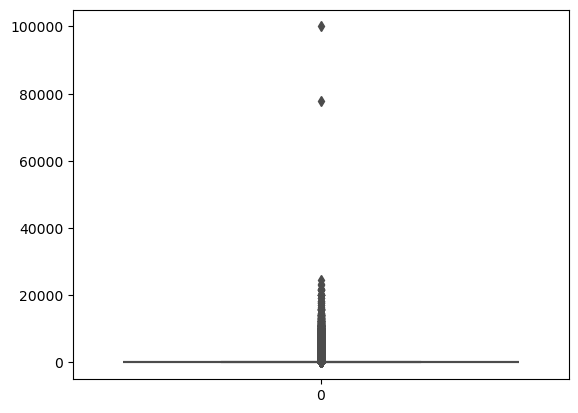

In [18]:
sns.boxplot(data = df['price'], color="blue")

PART 3

In [19]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

In [20]:
df['stars'].isnull().any()

False

Most customers do not rate the products. The most frequent and median rating is 0.

In [21]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, quantiles_rating

(4.81743402976196,
 2.1948653785054697,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

There is a high variance and standard deviation in ratings. While 50% of ratings are 0, the top 25% is 4.4.

In [22]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

The positive skewness indicates the distribution is slightly right-skewed. The higher ratings lean slightly to higher values. The kurtosis suggests the distribution of ratings is less peaked and have thinner tails.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


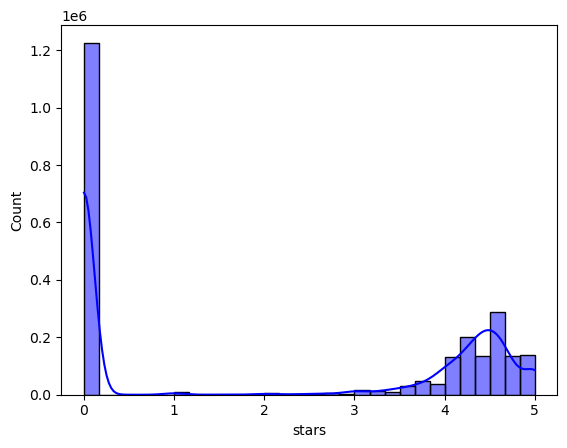

In [25]:
sns.histplot(df['stars'], kde = True, bins=30, color="blue");

The rating of 0 is more common than any other rating, followed by a rating between 4.5 & 5.